# ANN for classifying cats (vs. non-cats) WITH KERAS



## 1 - What for ##

- Learn to use keras for the simplest topologies (a number of dense layers)
- Compare the behavior and the performance with the numpy implementation

The following code is based on the ANN numpy notebook (codenamed 54) **only for loading and pre-processing the datasets**. The rest shall be new and done with keras

**RESET THE WHOLE NOTEBOOK FOR BETTER RESULTS**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

## 2 - Loading datasets ##

**Problem Statement**: You are given a dataset ("data.h5") containing:
    - a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
    - a test set of m_test images labeled as cat or non-cat
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

You will build a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat.

Let's get more familiar with the dataset. Load the data by running the following code.

In [2]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

We added "_orig" at the end of image datasets (train and test) because we are going to preprocess them. After preprocessing, we will end up with train_set_x and test_set_x (the labels train_set_y and test_set_y don't need any preprocessing).

Each line of your train_set_x_orig and test_set_x_orig is an array representing an image. You can visualize an example by running the following code. Feel free also to change the `index` value and re-run to see other images. 

y = [1], it's a 'cat' picture.


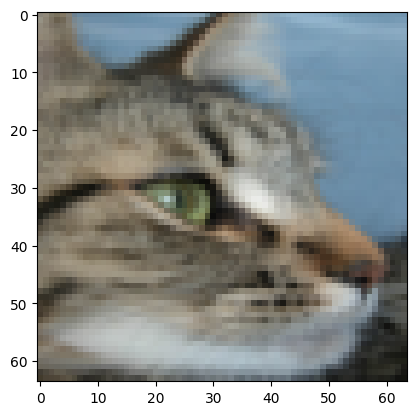

In [4]:
# Example of a picture
index = 68

plt.imshow(train_set_x_orig[index])
print ("y = " + 
       str(train_set_y[:, index]) + 
       ", it's a '" + 
       classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  
       "' picture.")

## 3 - Shape of arrays ##

**Problem Statement**: 

- 3.1. Print the array dimensions **using the .shape functionality from numpy**

- 3.2. You will have to "flatten" the images, so each image is one vector of all pixels * 3 (the RGB layers). What functions will you use? (consider this for later)

- 3.3. In comparison with the MNIST example dataset, Â¿is the shape of the y vector the same?

- 3.4. What type of data (python data type) is each array? Can you use these directly?

- 3.5. Have train and test datasets the same organization of data? (shape)





In [5]:
train_set_x_orig.shape
train_set_y.shape
test_set_x_orig.shape
test_set_y.shape
print(train_set_x_orig.shape, '\n', train_set_y.shape, '\n', test_set_x_orig.shape, '\n', test_set_y.shape, '\n')

(209, 64, 64, 3) 
 (1, 209) 
 (50, 64, 64, 3) 
 (1, 50) 



In [6]:
print(type(train_set_x_orig))

new_x = np.concatenate((train_set_x_orig, test_set_x_orig), axis=0)
new_x.shape

<class 'numpy.ndarray'>


(259, 64, 64, 3)

In [7]:
new_y = np.concatenate((train_set_y.T, test_set_y.T), axis=0)
new_y.shape

(259, 1)

## 4. Reshape X arrays and convert RGB values to float

- 4.1. (for both train and test) Flatten (reshape X array to a 1 column vector for each image). Verify that both train_ and test_x organization **is the same**
- 4.2. Normalize (divide by 255) the pixel values and make sure the output is float32


In [8]:
new_x_2 = new_x.reshape(new_x.shape[0], -1)
new_x_2.shape

(259, 12288)

In [9]:
new_x_2[0]
print(new_x_2.max())

final_x = new_x_2/255
print(final_x.shape)

255
(259, 12288)


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(final_x,
                                                   new_y,
                                                   test_size=0.25,
                                                   random_state=50)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(194, 12288)
(194, 1)
(65, 12288)
(65, 1)


## 5. Prepare y (labels) for keras

- 5.1. Reshape y vector so that it adapts to the keras convention: (number_of_instances, 1): use transpond (.T)
- 5.2. Use the to_categorical utility from keras for preparing the labels 


In [12]:
from keras.utils import to_categorical

In [13]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
y_train

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.

## 6 - Define and compile the ANN topology ##

- 6.1. Define the layers (Dense). Remember you have to specify:
- 6.2. Number of neurons for each layer
- 6.3. Activation function
- 6.4. For the first layer, the input_shape (already flattened)
- 6.5. For the last layer (the output layer), the number of neurons and the activation

And for the compilation you will need:

- 6.6. The optimizer
- 6.7. The loss function
- 6.8. (optional but recommended) a metrics function to print each model iteration (epoch) performance

In [15]:
from keras import models
from keras import layers

In [36]:
network = models.Sequential()
network.add(layers.Dense(256, 
                         activation='relu', 
                         input_shape=(64 * 64 * 3,)))

network.add(layers.Dense(64, 
                         activation='relu'))

network.add(layers.Dense(2, 
                         activation='softmax'))

In [37]:
network.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               3145984   
                                                                 
 dense_10 (Dense)            (None, 64)                16448     
                                                                 
 dense_11 (Dense)            (None, 2)                 130       
                                                                 
Total params: 3,162,562
Trainable params: 3,162,562
Non-trainable params: 0
_________________________________________________________________


In [38]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

## 7 - Compute (fit) the model ##

You need to specify:

- 7.1. Train X and y datasets
- 7.2. Number of epochs **Please do not use > 100, this problem might take looong in a normal laptop**
- 7.3. Batch_size

In [39]:
network.fit(X_train, 
            y_train, 
            epochs=50, 
            batch_size=64)

Epoch 1/50
4/4 [==============================] - 0s 15ms/step - loss: 17.2671 - accuracy: 0.4948
Epoch 2/50
4/4 [==============================] - 0s 14ms/step - loss: 4.6030 - accuracy: 0.5052
Epoch 3/50
4/4 [==============================] - 0s 14ms/step - loss: 3.9937 - accuracy: 0.5361
Epoch 4/50
4/4 [==============================] - 0s 14ms/step - loss: 2.2147 - accuracy: 0.5515
Epoch 5/50
4/4 [==============================] - 0s 13ms/step - loss: 2.2611 - accuracy: 0.5052
Epoch 6/50
4/4 [==============================] - 0s 14ms/step - loss: 2.0013 - accuracy: 0.5155
Epoch 7/50
4/4 [==============================] - 0s 14ms/step - loss: 2.3413 - accuracy: 0.5464
Epoch 8/50
4/4 [==============================] - 0s 14ms/step - loss: 0.7560 - accuracy: 0.6598
Epoch 9/50
4/4 [==============================] - 0s 14ms/step - loss: 2.0776 - accuracy: 0.5567
Epoch 10/50
4/4 [==============================] - 0s 14ms/step - loss: 1.4486 - accuracy: 0.6031
Epoch 11/50
4/4 [===========

## 8 - How does it perform with the test set? ##

Print accuracy **for the test set**

In [40]:
test_loss, test_acc = network.evaluate(X_test, y_test)

3/3 [==============================] - 0s 3ms/step - loss: 0.6520 - accuracy: 0.6000


In [41]:
print('test_acc', test_acc)

test_acc 0.6000000238418579


## 9 - Further analysis ##

- 9.1. What if we modify:
        - Optimizer
        - Learning rate
        - Batch size
        - Topology
        - Number of epochs
        ...
        